**Assignment: CIFAR-10 Classification**

During the last two weeks you learned how to make use of TensorFlow functionalities to build neural networks. This week you will do the same implementing a Convolutional Neural Network.

**1.1 Prepare the Dataset**

First familiarise yourself with the dataset. It is included as a TensorFlow Dataset but can also be obtained from other sources. Try to understand how it works (information in the data, dataset size, image size, are there color channels, type the data is stored as, etc.). Understanding the data you are working with and applying respective preprocessing steps is a major part of the process for real life applications.
Now that you familiarised yourself with it, load the data and apply respective preprocessing steps using a data pipeline (In case of problems refer to your old homework tasks or the Courseware). Visualize a sample of the dataset.

tf.Tensor([0. 0. 0. 0. 0. 0. 0. 0. 1. 0.], shape=(10,), dtype=float32)
tf.Tensor(0.0, shape=(), dtype=float32)


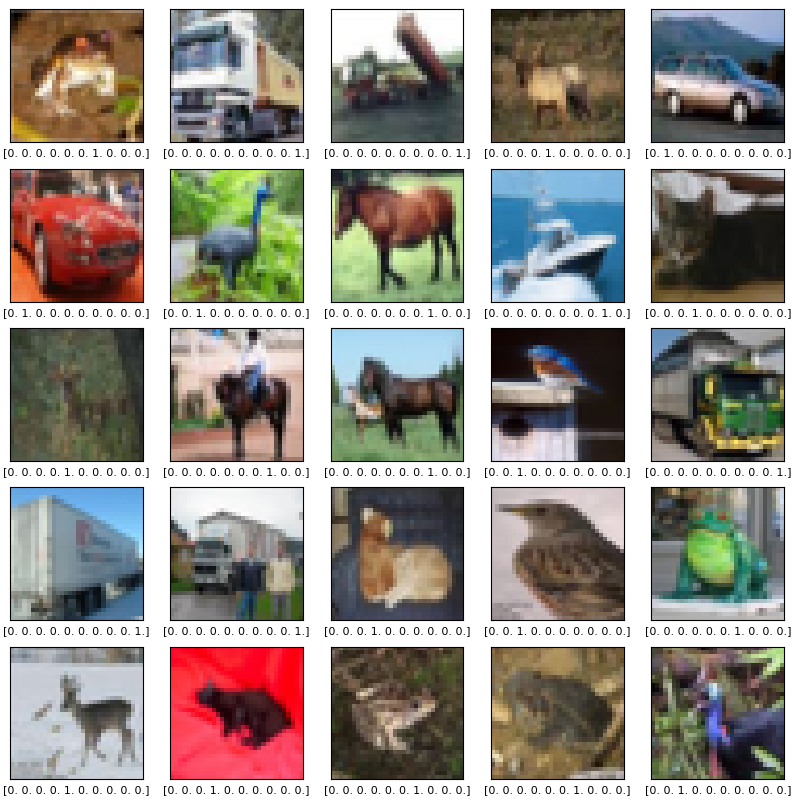

In [2]:
import tensorflow_datasets as tfds
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras import datasets, layers, models
from tensorflow.keras.layers import Dense


(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

#convert data to float32
train_images, test_images = tf.cast(train_images, tf.float32), tf.cast(test_images, tf.float32)

#normalize pixel values to be between -1 and 1
train_images, test_images = (train_images/255.), (test_images/255.)

#create one-hot targets
train_labels = tf.one_hot(tf.squeeze(train_labels), depth=10)  # Remove the singleton dimension
test_labels = tf.one_hot(tf.squeeze(test_labels), depth=10)  # Remove the singleton dimension

#print(test_labels[1])
#print(test_labels[1][0])

#visualization of a sample of the dataset

#create a new figure with size 10x10
plt.figure(figsize=(10,10))
#take a sample of 25 images
for i in range(25):
    #in a grid with 5x5 images, place image at inidex i+1
    plt.subplot(5,5,i+1)
    #"remove" x and y ticks
    plt.xticks([])
    plt.yticks([])
    #dont't show grid lines
    plt.grid(False)
    #show images at train_images[i]
    plt.imshow(train_images[i])
    #get the respective label of the current image and set it as xlabel
    plt.xlabel(str(train_labels[i].numpy()), fontsize = 8)

plt.show()


**1.2 The CNN Model**

Build a Convolutional Neural Network inspired by the information gained in this weeks Courseware. You are going to need more than the dense-layers used so far. Start with a basic structure and don’t necessarily think about optimizing the architecture too much, as this will be part of the last step.


In [3]:
#initialize the model
model = tf.keras.models.Sequential()
#adding layers to the model
model.add(layers.Conv2D(32,(3,3), activation = "relu", input_shape = (32,32,3))) #32 filters, 3x3 kernel size
model.add(layers.MaxPooling2D((2,2))) #2x2 poolsize
model.add(layers.Conv2D(64, (3, 3), activation='relu')) #64 filters, 3x3 kernel size
model.add(layers.MaxPooling2D((2, 2))) #2x2 poolsize
model.add(layers.Conv2D(64, (3, 3), activation='relu')) #64 filters, 3x3 kernel size

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
Total params: 56320 (220.00 KB)
Trainable params: 56320 

In [5]:
#complete the model by adding Dense layers
#flatten the 3D tensor - since Dense layers only take 1D vectors as input
model.add(layers.Flatten())
#add Dense layers
model.add(layers.Dense(64, activation = "relu"))
model.add(layers.Dense(10, activation = "softmax"))

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

**1.3 Training the network**

Define a training loop function. Define your hyperparameters, think of an appropriate loss function and optimizer and initialize everything. Store loss and accuracy for training and test data. Training your network for a maximum of 15 epochs should be enough.

In [7]:
#compile model
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

#fit model
history = model.fit(train_images, train_labels, epochs=15, validation_data=(test_images, test_labels))

Epoch 1/15
1563/1563 [==============================] - 20s 12ms/step - loss: 1.5868 - accuracy: 0.4199 - val_loss: 1.4311 - val_accuracy: 0.4755
Epoch 2/15
1563/1563 [==============================] - 20s 13ms/step - loss: 1.1669 - accuracy: 0.5872 - val_loss: 1.1498 - val_accuracy: 0.5967
Epoch 3/15
1563/1563 [==============================] - 20s 12ms/step - loss: 0.9885 - accuracy: 0.6537 - val_loss: 1.0063 - val_accuracy: 0.6548
Epoch 4/15
1563/1563 [==============================] - 20s 13ms/step - loss: 0.8757 - accuracy: 0.6937 - val_loss: 0.9339 - val_accuracy: 0.6784
Epoch 5/15
1563/1563 [==============================] - 20s 13ms/step - loss: 0.7952 - accuracy: 0.7238 - val_loss: 0.9025 - val_accuracy: 0.6926
Epoch 6/15
1563/1563 [==============================] - 20s 13ms/step - loss: 0.7253 - accuracy: 0.7491 - val_loss: 1.0667 - val_accuracy: 0.6620
Epoch 7/15
1563/1563 [==============================] - 20s 13ms/step - loss: 0.6691 - accuracy: 0.7671 - val_loss: 0.9281 -

**1.4 Visualization**

After training visualize the performance of your model and the values that you collected during training and testing.

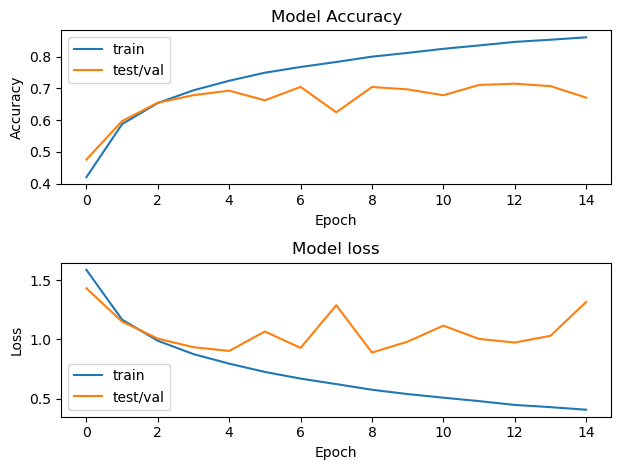

In [8]:
def visualize(history):
    fig, ax = plt.subplots(2)

    #accuracy on training and test/validation data set
    ax[0].plot(history.history['accuracy'])
    ax[0].plot(history.history['val_accuracy'])
    #set subplot title, labels and legend
    ax[0].set_title('Model Accuracy')
    ax[0].set_xlabel('Epoch')
    ax[0].set_ylabel('Accuracy')
    ax[0].legend(['train', 'test/val'], loc='upper left')

    #loss on training and test/validation data set
    ax[1].plot(history.history['loss'])
    ax[1].plot(history.history['val_loss'])
    #set subplot title, labels and legend
    ax[1].set_title('Model loss')
    ax[1].set_xlabel('Epoch')
    ax[1].set_ylabel('Loss')
    ax[1].legend(['train', 'test/val'], loc='lower left')

    fig.tight_layout()
    plt.show()

visualize(history)

**2 Adjust hyperparameters and architecture**

Now it is time to learn about the influence hyperparameter and training choices can make. Try out:

- Two different Learning Rates
- Two different Architectures (e.g. number and size of layers)
- Two different optimizers (Including Adam and one other)

In total this should create 8 respective settings, for each of which we ask you to plot:
- Training Accuracy
- Training Loss
- Test Accuracy
- Test Loss

To be explicit: This should result in a total of 8 times four plots!

Epoch 1/15
1563/1563 [==============================] - 19s 12ms/step - loss: 1.9363 - accuracy: 0.2838 - val_loss: 1.6771 - val_accuracy: 0.3876
Epoch 2/15
1563/1563 [==============================] - 19s 12ms/step - loss: 1.6535 - accuracy: 0.4078 - val_loss: 1.5015 - val_accuracy: 0.4567
Epoch 3/15
1563/1563 [==============================] - 19s 12ms/step - loss: 1.6308 - accuracy: 0.4224 - val_loss: 1.6911 - val_accuracy: 0.4156
Epoch 4/15
1563/1563 [==============================] - 20s 13ms/step - loss: 1.6216 - accuracy: 0.4259 - val_loss: 1.6415 - val_accuracy: 0.4385
Epoch 5/15
1563/1563 [==============================] - 19s 12ms/step - loss: 1.6116 - accuracy: 0.4323 - val_loss: 1.9458 - val_accuracy: 0.3400
Epoch 6/15
1563/1563 [==============================] - 19s 12ms/step - loss: 1.6059 - accuracy: 0.4341 - val_loss: 1.7991 - val_accuracy: 0.3990
Epoch 7/15
1563/1563 [==============================] - 19s 12ms/step - loss: 1.6126 - accuracy: 0.4300 - val_loss: 1.6783 -

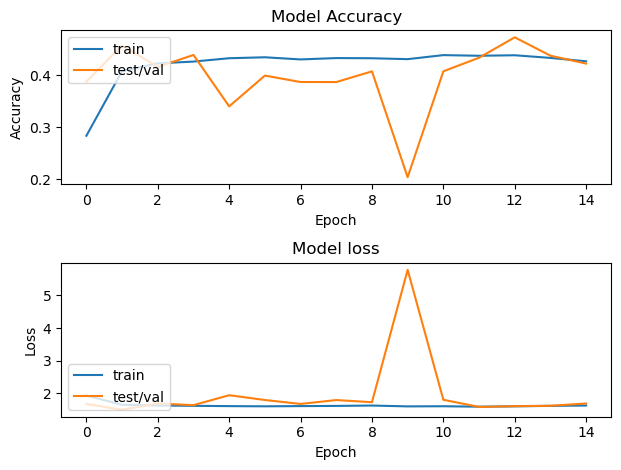

In [17]:
#Setting 1:  Learning rate = 0.01 with original model
model1 = tf.keras.models.clone_model(model)

model1.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.01),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

#fit model
history1 = model1.fit(train_images, train_labels, epochs=15, validation_data=(test_images, test_labels))
visualize(history1)

Epoch 1/15
1563/1563 [==============================] - 20s 12ms/step - loss: 1.6959 - accuracy: 0.3906 - val_loss: 1.4766 - val_accuracy: 0.4694
Epoch 2/15
1563/1563 [==============================] - 20s 13ms/step - loss: 1.3812 - accuracy: 0.5179 - val_loss: 1.3022 - val_accuracy: 0.5452
Epoch 3/15
1563/1563 [==============================] - 19s 12ms/step - loss: 1.3077 - accuracy: 0.5512 - val_loss: 1.3870 - val_accuracy: 0.5090
Epoch 4/15
1563/1563 [==============================] - 20s 12ms/step - loss: 1.2908 - accuracy: 0.5585 - val_loss: 1.2753 - val_accuracy: 0.5553
Epoch 5/15
1563/1563 [==============================] - 20s 13ms/step - loss: 1.2995 - accuracy: 0.5602 - val_loss: 1.3085 - val_accuracy: 0.5751
Epoch 6/15
1563/1563 [==============================] - 20s 13ms/step - loss: 1.2958 - accuracy: 0.5627 - val_loss: 1.6326 - val_accuracy: 0.5170
Epoch 7/15
1563/1563 [==============================] - 20s 13ms/step - loss: 1.2716 - accuracy: 0.5730 - val_loss: 1.4942 -

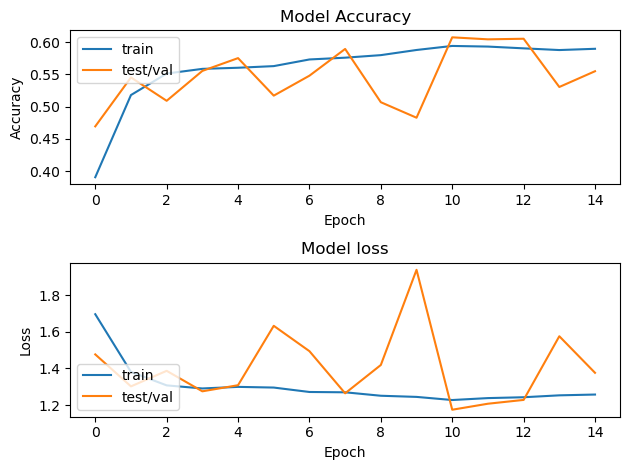

In [18]:
#Setting 2: Learning rate = 0.005 with original model
model2 = tf.keras.models.clone_model(model)

model2.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.005),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

#fit model
history2 = model2.fit(train_images, train_labels, epochs=15, validation_data=(test_images, test_labels))
visualize(history2)

Epoch 1/15
1563/1563 [==============================] - 20s 12ms/step - loss: 1.5685 - accuracy: 0.4307 - val_loss: 1.2359 - val_accuracy: 0.5583
Epoch 2/15
1563/1563 [==============================] - 20s 13ms/step - loss: 1.1468 - accuracy: 0.5963 - val_loss: 1.1741 - val_accuracy: 0.5900
Epoch 3/15
1563/1563 [==============================] - 20s 13ms/step - loss: 0.9579 - accuracy: 0.6649 - val_loss: 1.0889 - val_accuracy: 0.6304
Epoch 4/15
1563/1563 [==============================] - 19s 12ms/step - loss: 0.8392 - accuracy: 0.7094 - val_loss: 0.8812 - val_accuracy: 0.7062
Epoch 5/15
1563/1563 [==============================] - 20s 13ms/step - loss: 0.7545 - accuracy: 0.7391 - val_loss: 0.8807 - val_accuracy: 0.7045
Epoch 6/15
1563/1563 [==============================] - 21s 13ms/step - loss: 0.6826 - accuracy: 0.7641 - val_loss: 0.9906 - val_accuracy: 0.6722
Epoch 7/15
1563/1563 [==============================] - 21s 13ms/step - loss: 0.6294 - accuracy: 0.7834 - val_loss: 0.8914 -

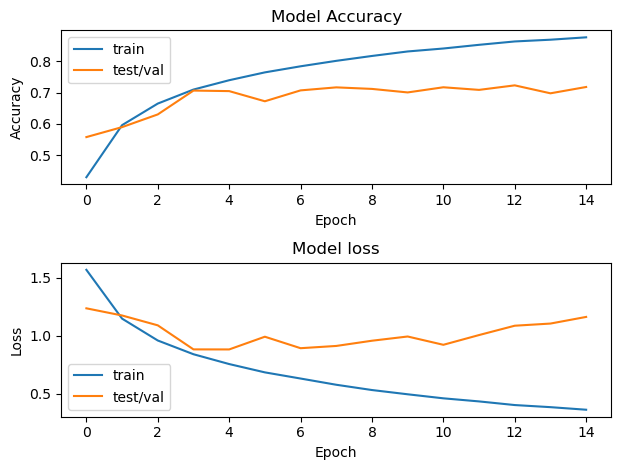

In [22]:
#Setting 3: with added 128 filters (insteat of 64) in the 4th layer
#initialize the model
model3 = tf.keras.models.Sequential()
#adding layers to the model
model3.add(layers.Conv2D(32,(3,3), activation = "relu", input_shape = (32,32,3))) #32 filters, 3x3 kernel size
model3.add(layers.MaxPooling2D((2,2))) #2x2 poolsize

model3.add(layers.Conv2D(64, (3, 3), activation='relu')) #64 filters
model3.add(layers.MaxPooling2D((2, 2))) 
model3.add(layers.Conv2D(128, (3, 3), activation='relu')) #128 filters instead of 64
model3.add(layers.MaxPooling2D((2, 2)))

#complete the model by adding Dense layers
#flatten the 3D tensor - since Dense layers only take 1D vectors as input
model3.add(layers.Flatten())
#add Dense layers
model3.add(layers.Dense(64, activation = "relu"))
model3.add(layers.Dense(10, activation = "softmax"))

model3.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

#fit model
history3 = model3.fit(train_images, train_labels, epochs=15, validation_data=(test_images, test_labels))
visualize(history3)

Epoch 1/15
1563/1563 [==============================] - 17s 11ms/step - loss: 1.5260 - accuracy: 0.4537 - val_loss: 1.3168 - val_accuracy: 0.5310
Epoch 2/15
1563/1563 [==============================] - 16s 10ms/step - loss: 1.1360 - accuracy: 0.6045 - val_loss: 1.0416 - val_accuracy: 0.6389
Epoch 3/15
1563/1563 [==============================] - 16s 10ms/step - loss: 0.9731 - accuracy: 0.6612 - val_loss: 0.9824 - val_accuracy: 0.6637
Epoch 4/15
1563/1563 [==============================] - 17s 11ms/step - loss: 0.8684 - accuracy: 0.7000 - val_loss: 0.9759 - val_accuracy: 0.6703
Epoch 5/15
1563/1563 [==============================] - 17s 11ms/step - loss: 0.7912 - accuracy: 0.7269 - val_loss: 1.0074 - val_accuracy: 0.6625
Epoch 6/15
1563/1563 [==============================] - 17s 11ms/step - loss: 0.7253 - accuracy: 0.7499 - val_loss: 1.0767 - val_accuracy: 0.6435
Epoch 7/15
1563/1563 [==============================] - 16s 11ms/step - loss: 0.6690 - accuracy: 0.7682 - val_loss: 1.0656 -

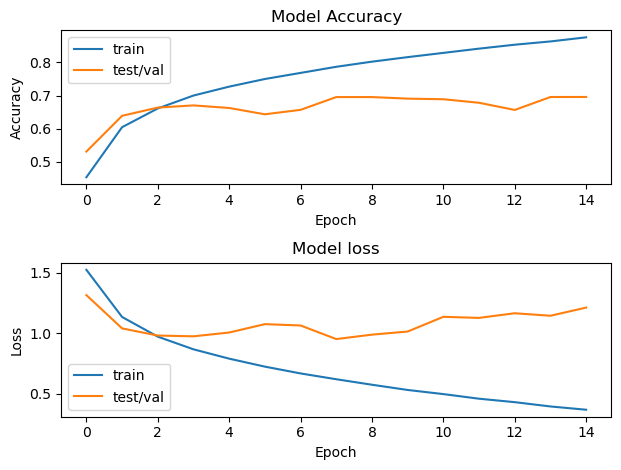

In [15]:
#Setting 4: with removed layers (with 64 filters)
#initialize the model
model4 = tf.keras.models.Sequential()
#adding layers to the model
model4.add(layers.Conv2D(32,(3,3), activation = "relu", input_shape = (32,32,3))) 
model4.add(layers.MaxPooling2D((2,2))) 

#model2.add(layers.Conv2D(64, (3, 3), activation='relu')) #64 filters
#model2.add(layers.MaxPooling2D((2, 2))) 

#complete the model by adding Dense layers
#flatten the 3D tensor - since Dense layers only take 1D vectors as input
model4.add(layers.Flatten())
#add Dense layers
model4.add(layers.Dense(64, activation = "relu"))
model4.add(layers.Dense(10, activation = "softmax"))

model4.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

#fit model
history4= model4.fit(train_images, train_labels, epochs=15, validation_data=(test_images, test_labels))
visualize(history4)

Epoch 1/15
1563/1563 [==============================] - 19s 12ms/step - loss: 2.2847 - accuracy: 0.1221 - val_loss: 2.2625 - val_accuracy: 0.1619
Epoch 2/15
1563/1563 [==============================] - 20s 13ms/step - loss: 2.2139 - accuracy: 0.1993 - val_loss: 2.1433 - val_accuracy: 0.2269
Epoch 3/15
1563/1563 [==============================] - 20s 13ms/step - loss: 2.0624 - accuracy: 0.2510 - val_loss: 2.0024 - val_accuracy: 0.2714
Epoch 4/15
1563/1563 [==============================] - 19s 12ms/step - loss: 1.9849 - accuracy: 0.2790 - val_loss: 1.9573 - val_accuracy: 0.2916
Epoch 5/15
1563/1563 [==============================] - 19s 12ms/step - loss: 1.9415 - accuracy: 0.2983 - val_loss: 1.9135 - val_accuracy: 0.3038
Epoch 6/15
1563/1563 [==============================] - 19s 12ms/step - loss: 1.8937 - accuracy: 0.3176 - val_loss: 1.8671 - val_accuracy: 0.3234
Epoch 7/15
1563/1563 [==============================] - 20s 12ms/step - loss: 1.8369 - accuracy: 0.3428 - val_loss: 1.7955 -

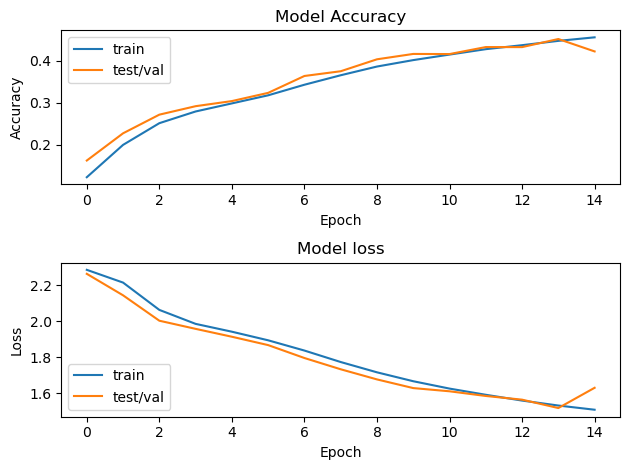

In [19]:
#Setting 5: original model with optimizer =  SGD, a Gradient decent (with momentum) optimizer
model5 = tf.keras.models.clone_model(model)

model5.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

#fit model
history5= model5.fit(train_images, train_labels, epochs=15, validation_data=(test_images, test_labels))
visualize(history5)

Epoch 1/15
1563/1563 [==============================] - 20s 12ms/step - loss: 1.5384 - accuracy: 0.4370 - val_loss: 1.3038 - val_accuracy: 0.5362
Epoch 2/15
1563/1563 [==============================] - 18s 12ms/step - loss: 1.1907 - accuracy: 0.5752 - val_loss: 1.0896 - val_accuracy: 0.6154
Epoch 3/15
1563/1563 [==============================] - 18s 12ms/step - loss: 1.0323 - accuracy: 0.6351 - val_loss: 0.9900 - val_accuracy: 0.6486
Epoch 4/15
1563/1563 [==============================] - 19s 12ms/step - loss: 0.9321 - accuracy: 0.6711 - val_loss: 0.9854 - val_accuracy: 0.6550
Epoch 5/15
1563/1563 [==============================] - 18s 12ms/step - loss: 0.8644 - accuracy: 0.6993 - val_loss: 0.9088 - val_accuracy: 0.6847
Epoch 6/15
1563/1563 [==============================] - 18s 12ms/step - loss: 0.8060 - accuracy: 0.7153 - val_loss: 0.9006 - val_accuracy: 0.6921
Epoch 7/15
1563/1563 [==============================] - 18s 12ms/step - loss: 0.7558 - accuracy: 0.7348 - val_loss: 0.9054 -

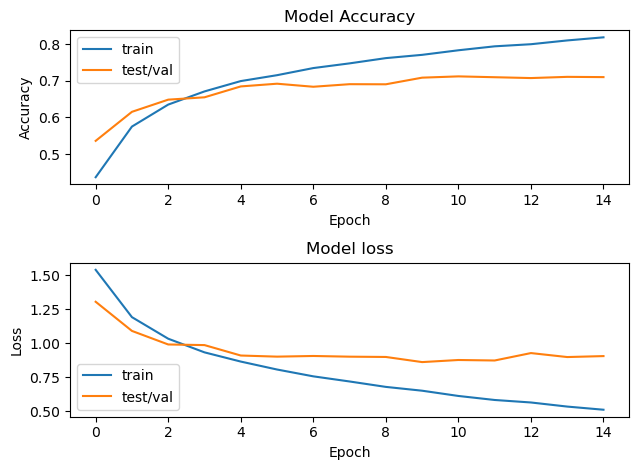

In [20]:
#Setting 6: original model with optimizer =  Adam
model6 = tf.keras.models.clone_model(model)

model6.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

#fit model
history6= model6.fit(train_images, train_labels, epochs=15, validation_data=(test_images, test_labels))
visualize(history6)

Epoch 1/15
1563/1563 [==============================] - 19s 12ms/step - loss: 1.4672 - accuracy: 0.4651 - val_loss: 1.1805 - val_accuracy: 0.5815
Epoch 2/15
1563/1563 [==============================] - 19s 12ms/step - loss: 1.0810 - accuracy: 0.6185 - val_loss: 1.0747 - val_accuracy: 0.6224
Epoch 3/15
1563/1563 [==============================] - 19s 12ms/step - loss: 0.9299 - accuracy: 0.6747 - val_loss: 0.9205 - val_accuracy: 0.6745
Epoch 4/15
1563/1563 [==============================] - 19s 12ms/step - loss: 0.8341 - accuracy: 0.7089 - val_loss: 0.8667 - val_accuracy: 0.6980
Epoch 5/15
1563/1563 [==============================] - 19s 12ms/step - loss: 0.7591 - accuracy: 0.7356 - val_loss: 0.8952 - val_accuracy: 0.6909
Epoch 6/15
1563/1563 [==============================] - 19s 12ms/step - loss: 0.6911 - accuracy: 0.7602 - val_loss: 0.8556 - val_accuracy: 0.7064
Epoch 7/15
1563/1563 [==============================] - 19s 12ms/step - loss: 0.6350 - accuracy: 0.7780 - val_loss: 0.8324 -

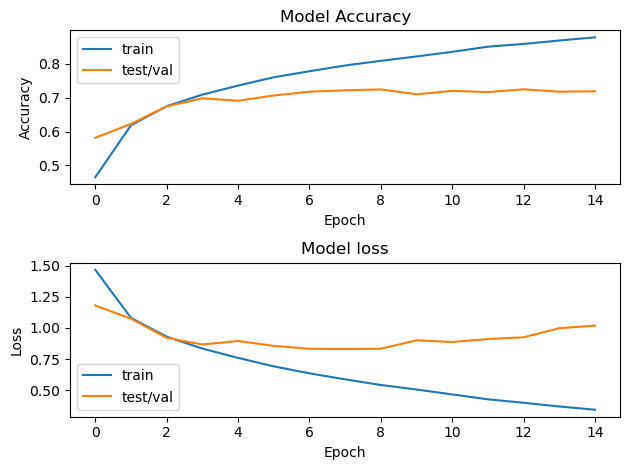

In [24]:
#Setting 7: model 3 with lr = 0.0001 and optimizer = Adam (these are the changes that resultet in the highest accuracy individualy)
model7 = tf.keras.models.clone_model(model3)

model7.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

#fit model
history7 = model7.fit(train_images, train_labels, epochs=15, validation_data=(test_images, test_labels))
visualize(history7)

Epoch 1/15
1563/1563 [==============================] - 28s 17ms/step - loss: 1.4405 - accuracy: 0.4763 - val_loss: 1.1766 - val_accuracy: 0.5751
Epoch 2/15
1563/1563 [==============================] - 28s 18ms/step - loss: 1.0329 - accuracy: 0.6378 - val_loss: 1.0417 - val_accuracy: 0.6362
Epoch 3/15
1563/1563 [==============================] - 31s 20ms/step - loss: 0.8459 - accuracy: 0.7026 - val_loss: 0.8819 - val_accuracy: 0.6955
Epoch 4/15
1563/1563 [==============================] - 31s 20ms/step - loss: 0.7158 - accuracy: 0.7501 - val_loss: 0.8019 - val_accuracy: 0.7247
Epoch 5/15
1563/1563 [==============================] - 27s 18ms/step - loss: 0.6149 - accuracy: 0.7839 - val_loss: 0.8038 - val_accuracy: 0.7274
Epoch 6/15
1563/1563 [==============================] - 31s 20ms/step - loss: 0.5284 - accuracy: 0.8145 - val_loss: 0.8342 - val_accuracy: 0.7324
Epoch 7/15
1563/1563 [==============================] - 31s 20ms/step - loss: 0.4454 - accuracy: 0.8424 - val_loss: 0.8965 -

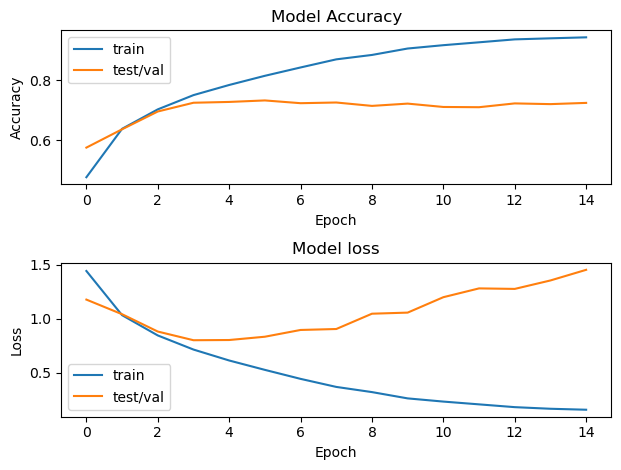

In [27]:
#Setting 8: with added layers with 128 filters (insteat of 64) and with 256 filters, with optimizer = Adam
#initialize the model
model8 = tf.keras.models.Sequential()
#adding layers to the model
model8.add(layers.Conv2D(32,(3,3), activation = "relu", input_shape = (32,32,3))) #32 filters, 3x3 kernel size
model8.add(layers.MaxPooling2D((2,2))) #2x2 poolsize

model8.add(layers.Conv2D(64, (3, 3), activation='relu')) #64 filters
model8.add(layers.MaxPooling2D((2, 2))) 
model8.add(layers.Conv2D(128, (3, 3), activation='relu', padding= "same")) #128 filters instead of 64
model8.add(layers.MaxPooling2D((2, 2)))
model8.add(layers.Conv2D(256, (3, 3), activation='relu', padding= "same")) #256 filters instead of 64
model8.add(layers.MaxPooling2D((2, 2)))

#complete the model by adding Dense layers
#flatten the 3D tensor - since Dense layers only take 1D vectors as input
model8.add(layers.Flatten())
#add Dense layers
model8.add(layers.Dense(64, activation = "relu"))
model8.add(layers.Dense(10, activation = "softmax"))

model8.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

#fit model
history8 = model8.fit(train_images, train_labels, epochs=15, validation_data=(test_images, test_labels))
visualize(history8)